In [74]:
	

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report
import os

In [75]:
import pandas as pd

file_path = "/Users/zhangluolin/Downloads/regression_data.csv" #file downloaded

df = pd.read_csv(file_path)

print(df.head())  


  Loan Sequence Number  Credit Score Occupancy Status  \
0                  NaN         629.0                P   
1         F14Q10000001         770.0                P   
2         F14Q10000002         674.0                P   
3         F14Q10000003         717.0                I   
4         F14Q10000004         813.0                P   

   Original Combined Loan-to-Value (CLTV)  \
0                                    77.0   
1                                    89.0   
2                                    89.0   
3                                    77.0   
4                                    95.0   

   Original Debt-to-Income (DTI) Ratio  Original UPB  \
0                                 45.0      324000.0   
1                                 30.0       65000.0   
2                                999.0      182000.0   
3                                 41.0      107000.0   
4                                 32.0      165000.0   

   Original Loan-to-Value (LTV)  Original Interes

In [76]:
df.describe()

,Credit Score,Original Combined Loan-to-Value (CLTV),Original Debt-to-Income (DTI) Ratio,Original UPB,Original Loan-to-Value (LTV),Original Interest Rate,Original Loan Term,Number of Borrowers,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Current Interest Rate,Current Deferred UPB,Estimated Loan-to-Value (ELTV),Default
count,2.032312e+07,2.032312e+07,2.032312e+07,2.032312e+07,2.032312e+07,2.032312e+07,2.032312e+07,2.032312e+07,2.032312e+07,2.031492e+07,2.032312e+07,2.032312e+07,2.032312e+07,2.032312e+07,1.976557e+07,2.032312e+07
mean,7.524425e+02,7.307062e+01,5.500394e+01,2.696437e+05,7.270638e+01,4.004895e+00,3.248354e+02,1.483010e+00,1.398112e+05,4.227794e-02,4.249073e+01,2.830604e+02,4.002977e+00,1.457126e+02,4.316879e+02,1.035185e-02
std,1.322032e+02,1.817295e+01,1.387154e+02,1.453568e+05,1.799182e+01,1.228829e+00,6.934942e+01,5.173561e-01,1.645624e+05,7.669504e-01,2.685686e+01,7.843377e+01,1.228927e+00,2.047718e+03,4.663765e+02,1.012161e-01
min,3.000000e+02,1.000000e+00,1.000000e+00,1.000000e+03,1.000000e+00,0.000000e+00,6.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e+00,1.500000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,7.200000e+02,6.300000e+01,2.800000e+01,1.600000e+05,6.200000e+01,3.000000e+00,3.600000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01,2.630000e+02,3.000000e+00,0.000000e+00,4.400000e+01,0.000000e+00
50%,7.600000e+02,7.700000e+01,3.600000e+01,2.420000e+05,7.600000e+01,3.750000e+00,3.600000e+02,1.000000e+00,9.369319e+04,0.000000e+00,4.100000e+01,3.130000e+02,3.750000e+00,0.000000e+00,7.000000e+01,0.000000e+00
75%,7.880000e+02,8.500000e+01,4.300000e+01,3.520000e+05,8.500000e+01,4.500000e+00,3.600000e+02,2.000000e+00,2.374729e+05,0.000000e+00,5.400000e+01,3.340000e+02,4.500000e+00,0.000000e+00,9.990000e+02,0.000000e+00
max,9.999000e+03,9.990000e+02,9.990000e+02,2.212000e+06,9.990000e+02,9.750000e+00,5.590000e+02,9.900000e+01,2.190566e+06,1.160000e+02,1.340000e+02,5.070000e+02,9.750000e+00,3.750000e+05,9.990000e+02,1.000000e+00


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20323122 entries, 0 to 20323121
Data columns (total 19 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   Loan Sequence Number                    object 
 1   Credit Score                            float64
 2   Occupancy Status                        object 
 3   Original Combined Loan-to-Value (CLTV)  float64
 4   Original Debt-to-Income (DTI) Ratio     float64
 5   Original UPB                            float64
 6   Original Loan-to-Value (LTV)            float64
 7   Original Interest Rate                  float64
 8   Property State                          object 
 9   Original Loan Term                      float64
 10  Number of Borrowers                     float64
 11  Current Actual UPB                      float64
 12  Current Loan Delinquency Status         float64
 13  Loan Age                                float64
 14  Remaining Months to Legal Maturi

In [78]:
df.shape

(20323122, 19)

In [79]:
df.isnull().sum()

Loan Sequence Number                           3
Credit Score                                   3
Occupancy Status                               3
Original Combined Loan-to-Value (CLTV)         3
Original Debt-to-Income (DTI) Ratio            3
Original UPB                                   3
Original Loan-to-Value (LTV)                   3
Original Interest Rate                         3
Property State                                 3
Original Loan Term                             3
Number of Borrowers                            3
Current Actual UPB                             3
Current Loan Delinquency Status             8200
Loan Age                                       3
Remaining Months to Legal Maturity             3
Current Interest Rate                          3
Current Deferred UPB                           3
Estimated Loan-to-Value (ELTV)            557555
Default                                        0
dtype: int64

In [80]:
df[df["Loan Sequence Number"].duplicated()]

,Loan Sequence Number,Credit Score,Occupancy Status,Original Combined Loan-to-Value (CLTV),Original Debt-to-Income (DTI) Ratio,Original UPB,Original Loan-to-Value (LTV),Original Interest Rate,Property State,Original Loan Term,Number of Borrowers,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Current Interest Rate,Current Deferred UPB,Estimated Loan-to-Value (ELTV),Default
7501829,NaN,800.0,P,80.0,25.0,348000.0,80.0,4.250,CA,360.0,2.0,0.0,0.0,8.0,352.0,4.250,0.0,999.0,0
15236772,NaN,739.0,P,63.0,35.0,120000.0,63.0,2.625,TX,180.0,2.0,93595.5,0.0,42.0,138.0,2.625,0.0,38.0,0


In [81]:
df['Default'].value_counts()

0    20112740
1      210382
Name: Default, dtype: int64

In [82]:
import numpy as np
numeric_cols = df.select_dtypes(include=np.number).columns


In [83]:
print("Total records:", len(df))
print("Total unique loans:", df['Loan Sequence Number'].nunique())

Total records: 20323122
Total unique loans: 20323119


In [84]:

import matplotlib.pyplot as plt
import seaborn as sns

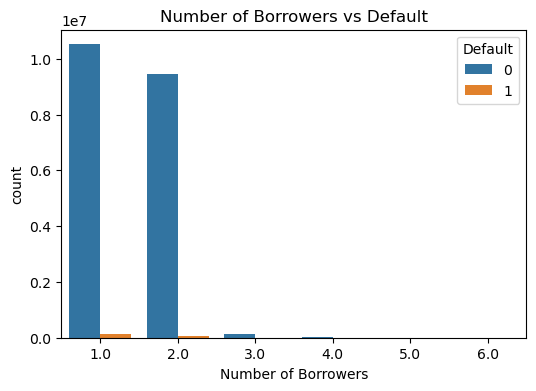

In [85]:
# Clean Number of Borrowers
df['Number of Borrowers'] = pd.to_numeric(df['Number of Borrowers'], errors='coerce')
df['Number of Borrowers'] = df['Number of Borrowers'].apply(
    lambda x: 99 if pd.isna(x) else x
)

# Number of Borrowers vs Default
plt.figure(figsize=(6, 4))
sns.countplot(x='Number of Borrowers', hue='Default', data=df[df['Number of Borrowers'] != 99])  # Exclude missing (99)
plt.title('Number of Borrowers vs Default')
plt.show()

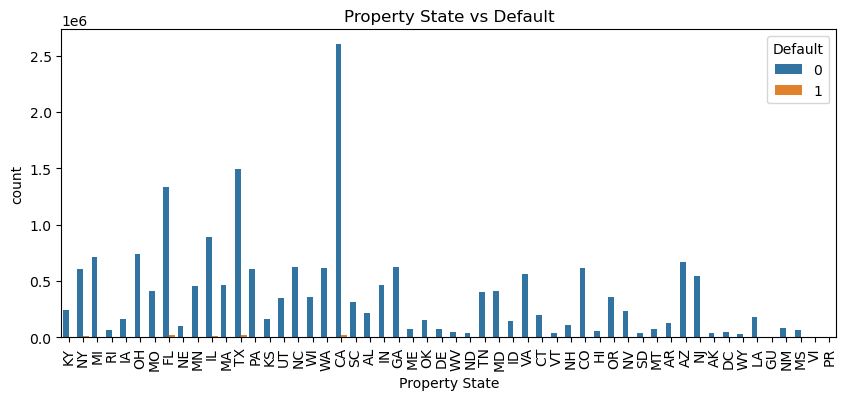

In [86]:
# Clean Property State (ensure categorical, no numeric conversion needed)
# Assuming it's already a string, no cleaning beyond ensuring valid states can be added if needed

# Property State vs Default
plt.figure(figsize=(10, 4))
sns.countplot(x='Property State', hue='Default', data=df)
plt.title('Property State vs Default')
plt.xticks(rotation=90)
plt.show()

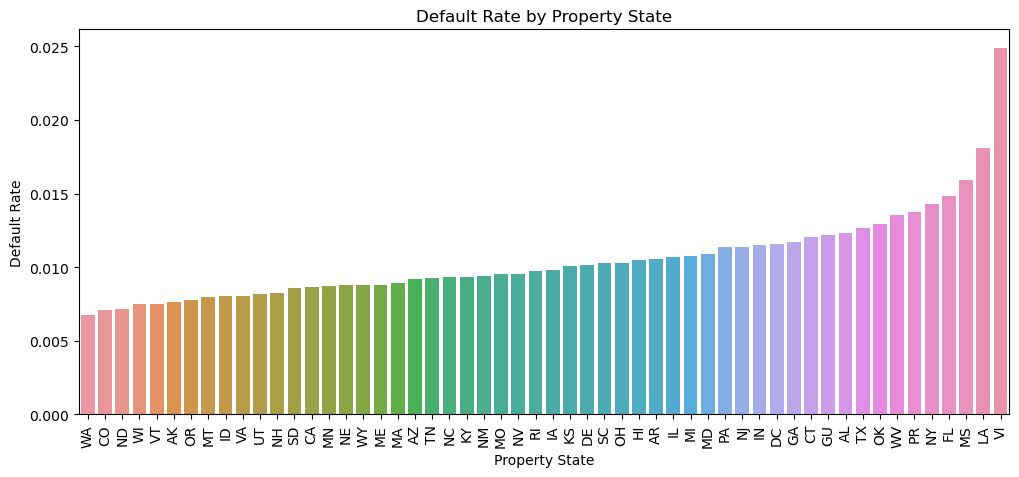

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute default rate per state
state_default = df.groupby('Property State')['Default'].mean().sort_values()

plt.figure(figsize=(12,5))
sns.barplot(x=state_default.index, y=state_default.values)
plt.xticks(rotation=90)
plt.ylabel('Default Rate')
plt.title('Default Rate by Property State')
plt.show()


In [88]:
# Summary table per state
state_summary = df.groupby('Property State')['Default'].agg(
    total_loans='count',
    total_defaults='sum'
).reset_index()

# Compute default rate
state_summary['default_rate'] = state_summary['total_defaults'] / state_summary['total_loans']

# Sort by default rate descending
state_summary = state_summary.sort_values(by='default_rate', ascending=False)

# Display the table
print(state_summary)


   Property State  total_loans  total_defaults  default_rate
48             VI         1325              33      0.024906
19             LA       183917            3328      0.018095
26             MS        70767            1125      0.015897
9              FL      1354022           20056      0.014812
35             NY       617990            8825      0.014280
40             PR         3716              51      0.013724
52             WV        53320             722      0.013541
37             OK       160294            2073      0.012932
45             TX      1514100           19178      0.012666
1              AL       219019            2695      0.012305
11             GU         2546              31      0.012176
6              CT       201907            2430      0.012035
10             GA       635421            7427      0.011688
7              DC        45707             528      0.011552
16             IN       475455            5485      0.011536
32             NJ       

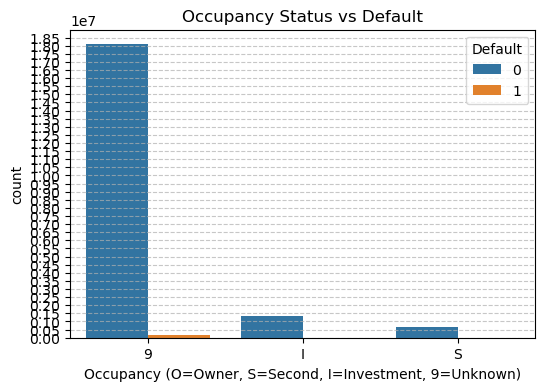

In [89]:
# Clean Occupancy Status
df['Occupancy Status'] = df['Occupancy Status'].astype(str).str.strip()
df['Occupancy Status'] = df['Occupancy Status'].apply(
    lambda x: '9' if x not in ['O', 'S', 'I'] else x
)
# Occupancy Status vs Default
plt.figure(figsize=(6, 4))
sns.countplot(x='Occupancy Status', hue='Default', data=df)
plt.title('Occupancy Status vs Default')
plt.xlabel('Occupancy (O=Owner, S=Second, I=Investment, 9=Unknown)')

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(500000))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

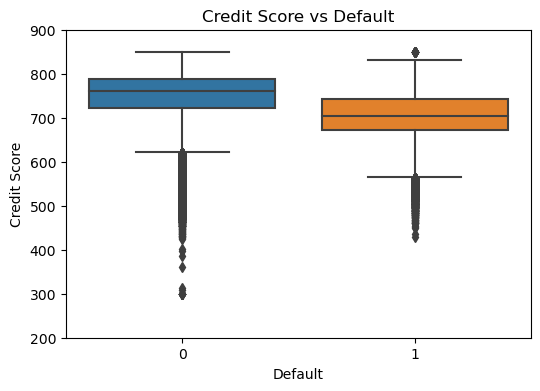

In [90]:
# Clean Credit Score based on guide notes
df['Credit Score'] = pd.to_numeric(df['Credit Score'], errors='coerce')
df['Credit Score'] = df['Credit Score'].apply(
    lambda x: 300 if x < 300 else 850 if x > 850 else 9999 if pd.isna(x) else x
)

# Credit Score vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Credit Score', data=df)
plt.title('Credit Score vs Default')
plt.ylim(200, 900)
plt.show()

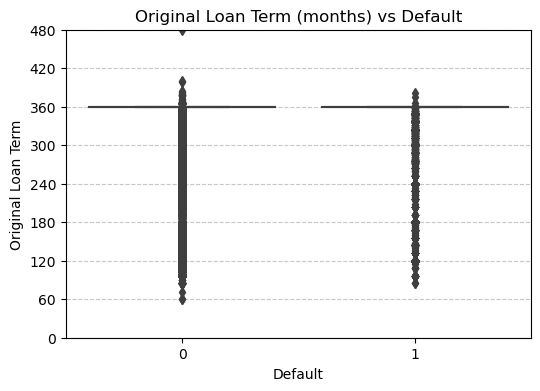

In [91]:
# Clean Original Loan Term (no capping needed, just ensure numeric)
df['Original Loan Term'] = pd.to_numeric(df['Original Loan Term'], errors='coerce')

# Original Loan Term vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Original Loan Term', data=df)
plt.title('Original Loan Term (months) vs Default')
plt.ylim(0, 480)  # Reasonable upper limit (e.g., 40 years in months)
#grid yaxis to each 5 years (60 months)
plt.yticks(range(0, 481, 60), [str(i) for i in range(0, 481, 60)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

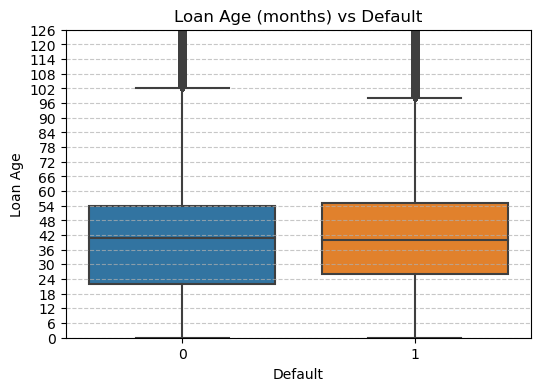

In [92]:
# Clean Loan Age
df['Loan Age'] = pd.to_numeric(df['Loan Age'], errors='coerce')
df['Loan Age'] = df['Loan Age'].apply(
    lambda x: 999 if pd.isna(x) else x
)

# Loan Age vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Loan Age', data=df[df['Loan Age'] != 999])  # Exclude missing (999)
plt.title('Loan Age (months) vs Default')
plt.ylim(0, 120)  #  upper limit (e.g., 10 years in months)

plt.yticks(range(0, 128, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

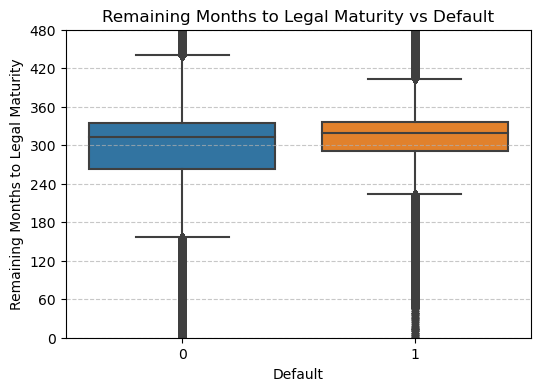

In [93]:
# Clean Remaining Months to Legal Maturity
df['Remaining Months to Legal Maturity'] = pd.to_numeric(df['Remaining Months to Legal Maturity'], errors='coerce')
df['Remaining Months to Legal Maturity'] = df['Remaining Months to Legal Maturity'].apply(
    lambda x: 999 if pd.isna(x) else x
)

# Remaining Months to Legal Maturity vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Remaining Months to Legal Maturity', data=df[df['Remaining Months to Legal Maturity'] != 999])  # Exclude missing (999)
plt.title('Remaining Months to Legal Maturity vs Default')
plt.ylim(0, 480)  # Reasonable upper limit (e.g., 40 years in months)

plt.yticks(range(0, 481, 60), [str(i) for i in range(0, 481, 60)])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

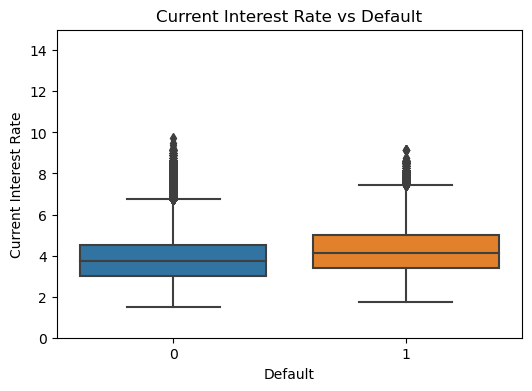

In [94]:
# Clean Current Interest Rate
df['Current Interest Rate'] = pd.to_numeric(df['Current Interest Rate'], errors='coerce')
df['Current Interest Rate'] = df['Current Interest Rate'].apply(
    lambda x: 99.999 if pd.isna(x) else x
)

# Current Interest Rate vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Current Interest Rate', data=df[df['Current Interest Rate'] != 99.999])  # Exclude missing (99.999)
plt.title('Current Interest Rate vs Default')
plt.ylim(0, 15)  # Reasonable upper limit (e.g., 15%)
plt.show()

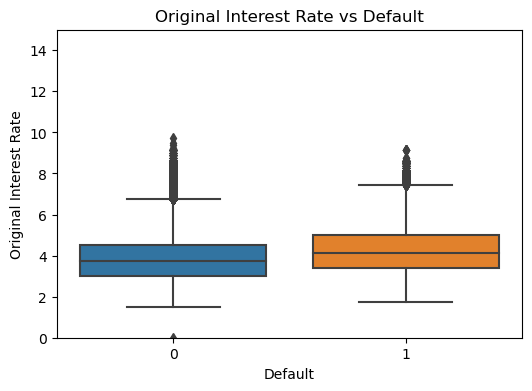

In [95]:
# Clean Original Interest Rate (no capping needed, just ensure numeric)
df['Original Interest Rate'] = pd.to_numeric(df['Original Interest Rate'], errors='coerce')

# Original Interest Rate vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Original Interest Rate', data=df)
plt.title('Original Interest Rate vs Default')
plt.ylim(0, 15)  # Reasonable upper limit for interest rates (e.g., 15%)
plt.show()

In [96]:
# Clean Original Loan-to-Value (LTV)
df['Original Loan-to-Value (LTV)'] = pd.to_numeric(df['Original Loan-to-Value (LTV)'], errors='coerce')
df['Original Loan-to-Value (LTV)'] = df['Original Loan-to-Value (LTV)'].apply(
    lambda x: 999 if pd.isna(x) else x
)

ltv_values= df[df['Original Loan-to-Value (LTV)'] != 999]['Original Loan-to-Value (LTV)']
ltv_values.describe()

count    2.032300e+07
mean     7.270073e+01
std      1.784579e+01
min      1.000000e+00
25%      6.200000e+01
50%      7.600000e+01
75%      8.500000e+01
max      9.290000e+02
Name: Original Loan-to-Value (LTV), dtype: float64

In [97]:
# count ltv values greater than 100
print("LTV values greater than 100:", (ltv_values > 100).sum())

LTV values greater than 100: 53915


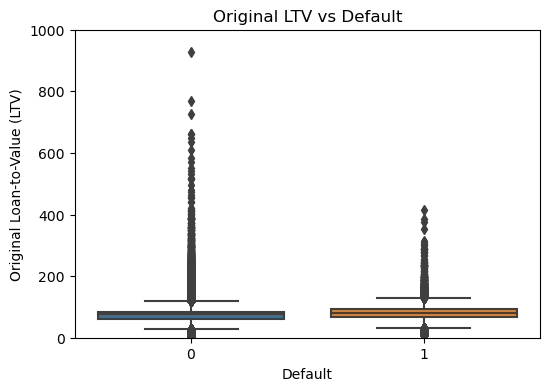

In [98]:
# Original LTV vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Original Loan-to-Value (LTV)', data= df[df['Original Loan-to-Value (LTV)'] != 999])  # Exclude missing
plt.ylim(0, 1000)  # Reasonable upper limit for LTV
plt.title('Original LTV vs Default')
plt.show()

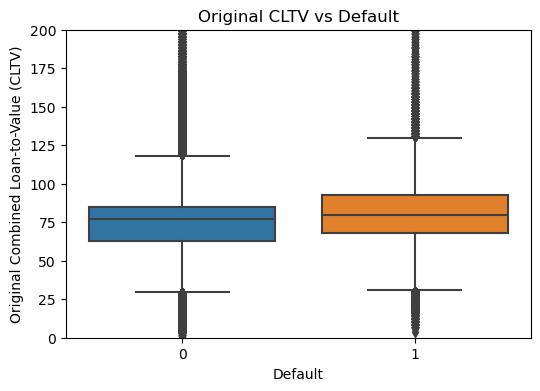

In [99]:
# Clean Original Combined Loan-to-Value (CLTV)
df['Original Combined Loan-to-Value (CLTV)'] = pd.to_numeric(df['Original Combined Loan-to-Value (CLTV)'], errors='coerce')
df['Original Combined Loan-to-Value (CLTV)'] = df['Original Combined Loan-to-Value (CLTV)'].apply(
    lambda x: 999 if pd.isna(x) else x
)

# Original CLTV vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Original Combined Loan-to-Value (CLTV)', data= df[df['Original Combined Loan-to-Value (CLTV)'] != 999])  # Exclude missing (999)
plt.title('Original CLTV vs Default')
plt.ylim(0, 200)  # Reasonable upper limit for CLTV
plt.show()

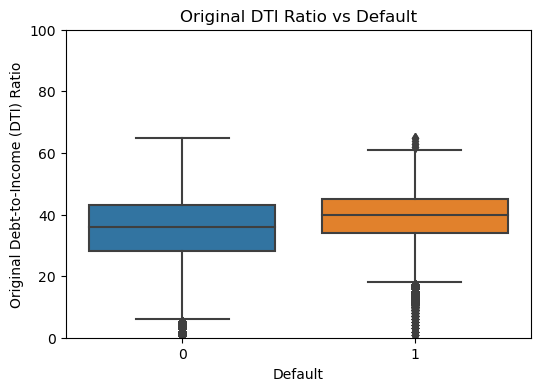

In [100]:
# Clean Original Debt-to-Income (DTI) Ratio
df['Original Debt-to-Income (DTI) Ratio'] = pd.to_numeric(df['Original Debt-to-Income (DTI) Ratio'], errors='coerce')
df['Original Debt-to-Income (DTI) Ratio'] = df['Original Debt-to-Income (DTI) Ratio'].apply(
    lambda x: 999 if pd.isna(x) else x
)

# Original DTI Ratio vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Original Debt-to-Income (DTI) Ratio', data= df)
plt.title('Original DTI Ratio vs Default')
plt.ylim(0, 100)
plt.show()

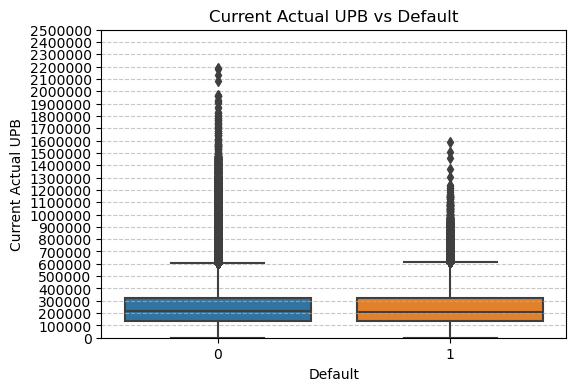

In [101]:
# Clean Current Actual UPB
df['Current Actual UPB'] = pd.to_numeric(df['Current Actual UPB'], errors='coerce')
df['Current Actual UPB'] = df['Current Actual UPB'].apply(
    lambda x: 0 if x == 0 or pd.isna(x) else x
)

# Current Actual UPB vs Default
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Current Actual UPB', data= df[df['Current Actual UPB'] != 0])  # Exclude zero balance (000000)
plt.title('Current Actual UPB vs Default')
plt.ylim(0, 2500000)  # Reasonable upper limit in $1,000s

plt.yticks(range(0, 2500001, 100000), [str(i) for i in range(0, 2500001, 100000)])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

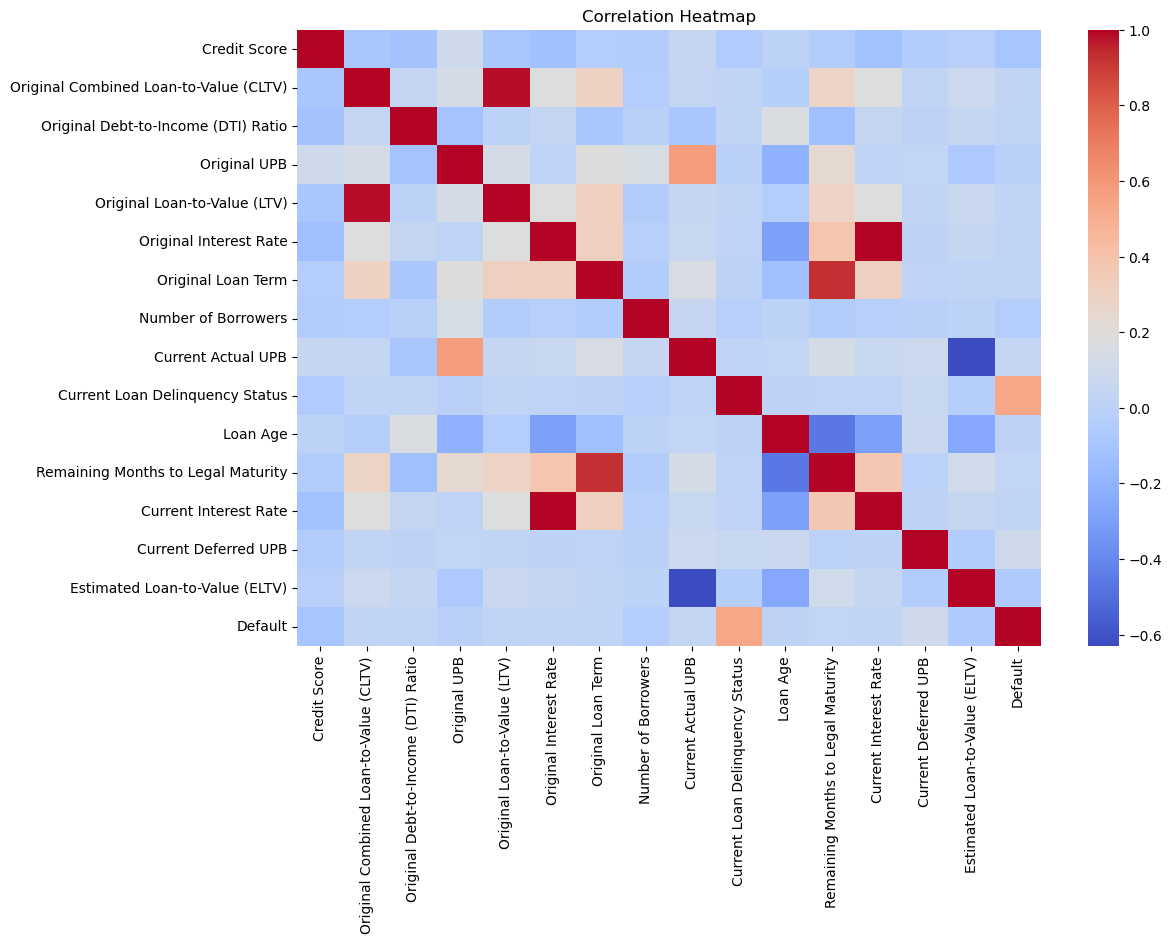

In [102]:
# Checking the correaltions
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [103]:

df_clean = df.dropna()

In [104]:
df_clean['Default'].value_counts()

0    19552983
1      204698
Name: Default, dtype: int64

In [105]:

target = 'Default'
features = [col for col in df.columns if col not in [target, 'Loan Sequence Number']]
# Define features and target after imputation
X = df_clean.drop(columns=['Default', 'Current Loan Delinquency Status','Property State','Occupancy Status','Loan Sequence Number','Original Loan-to-Value (LTV)','Original UPB','Original Loan Term','Original Interest Rate','Original Combined Loan-to-Value (CLTV)','Loan Age']).copy()
y = df_clean[target].copy()

# Scale numeric features with .loc to avoid SettingWithCopyWarning
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])  # Use .loc for assignment


In [106]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [107]:
# Resample training set (all defaults + sampled non-defaults)

df_train = pd.concat([X_train_full, y_train_full], axis=1)
df_default = df_train[df_train[target] == 1]
df_nondefault = df_train[df_train[target] == 0]


In [108]:
# 1:6 ratio
n_nondefault = len(df_default) * 6
replace_nondefault = n_nondefault > len(df_nondefault)

In [109]:
df_nondefault_sample = df_nondefault.sample(n=n_nondefault, replace=replace_nondefault, random_state=42)
df_resampled = pd.concat([df_default, df_nondefault_sample])

X_train_resampled = df_resampled.drop(columns=[target])
y_train_resampled = df_resampled[target]


In [110]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [111]:
X_calib, X_eval, y_calib, y_eval = train_test_split(
    X_test_full, y_test_full, test_size=0.5, stratify=y_test_full, random_state=42)

In [112]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [113]:
calibrated_model = CalibratedClassifierCV(estimator=model, method='sigmoid', cv='prefit')
calibrated_model.fit(X_calib, y_calib)

y_prob_calibrated = calibrated_model.predict_proba(X_eval)[:, 1]

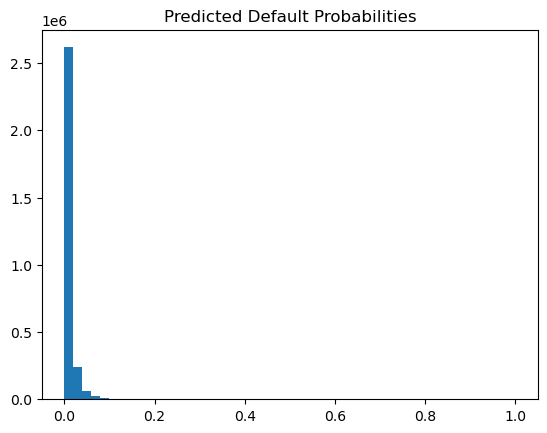

In [114]:
plt.hist(y_prob_calibrated, bins=50)
plt.title("Predicted Default Probabilities")
plt.show()


In [117]:
threshold = 0.03 #low threshold 
y_pred_tuned = (y_prob_calibrated >= threshold).astype(int)

roc_auc = roc_auc_score(y_eval, y_prob_calibrated)
precision = precision_score(y_eval, y_pred_tuned)
recall = recall_score(y_eval, y_pred_tuned)
conf_matrix = confusion_matrix(y_eval, y_pred_tuned)

print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")




ROC-AUC Score: 0.8345
Precision: 0.0693
Recall: 0.4173


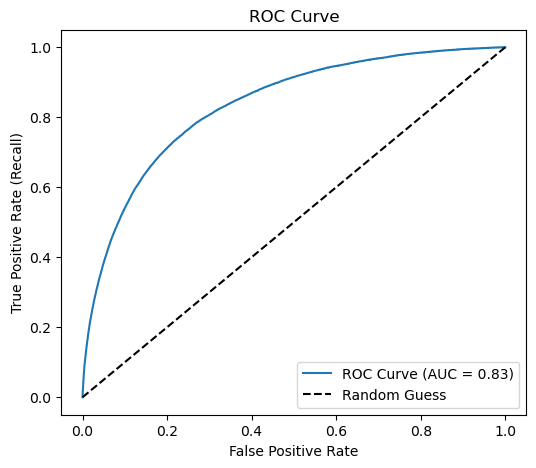

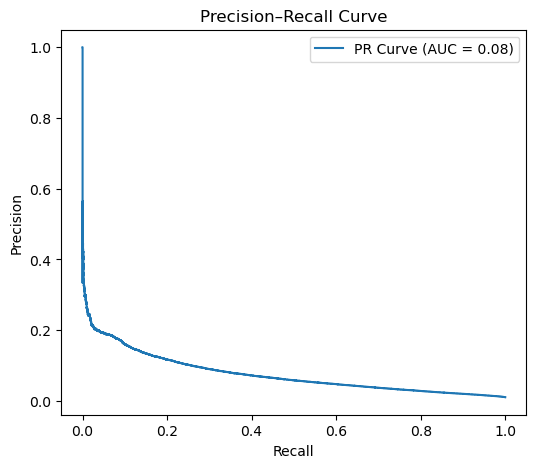


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97   2932948
           1       0.07      0.42      0.12     30705

    accuracy                           0.94   2963653
   macro avg       0.53      0.68      0.54   2963653
weighted avg       0.98      0.94      0.96   2963653



In [118]:

# ROC Curve
fpr, tpr, _ = roc_curve(y_eval, y_prob_calibrated)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision–Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_eval, y_prob_calibrated)
pr_auc = auc(recalls, precisions)

plt.figure(figsize=(6,5))
plt.plot(recalls, precisions, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.legend()
plt.show()

print("\nClassification Report:")
print(classification_report(y_eval, y_pred_tuned))